In [ ]:
import kagglehub
hijest_genre_classification_dataset_imdb_path = kagglehub.dataset_download('hijest/genre-classification-dataset-imdb')

print('Data source import complete.')


Data source import complete.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hijest/genre-classification-dataset-imdb")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/hijest/genre-classification-dataset-imdb/versions/1


In [ ]:
import seaborn as sns
import re  # used for pattern matching and text manipulation.
import string
import nltk #a powerful library for working with human language data.
from nltk.corpus import stopwords #for cleaning
from nltk.stem import LancasterStemmer ##for cleaning
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import MultinomialNB
import re

In [ ]:
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_data = pd.read_csv('train_data.txt', sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")
train_data

,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
4758,Angshumaner Chhobi (2009),drama,"Angshuman, a young film director, comes back ..."
4759,Kamerayla Izdivac (2010),documentary,The film shows us the unknown face of TV worl...
4760,Lost: 2010 PaleyFest (2010),talk-show,The exclusive release of the PaleyFest2010 li...
4761,Oy Vey! My Son Is Gay!! (2009),comedy,A romantic comedy featuring a Jewish family w...


In [ ]:
test_data = pd.read_csv('test_data.txt', sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")
test_data

,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
4904,4905,Composer Alive: Eastern Expressions (2007),Composer Alive: Eastern Expressions explores ...
4905,4906,At Meydani Hippodrome (2011),This 70 minutes documentary tells 10 differen...
4906,4907,Taking the Hill (2006),An intensely honest and hope-filled documenta...
4907,4908,Dreaming for You (2009),"Adam, a lonely young actor living in New York..."


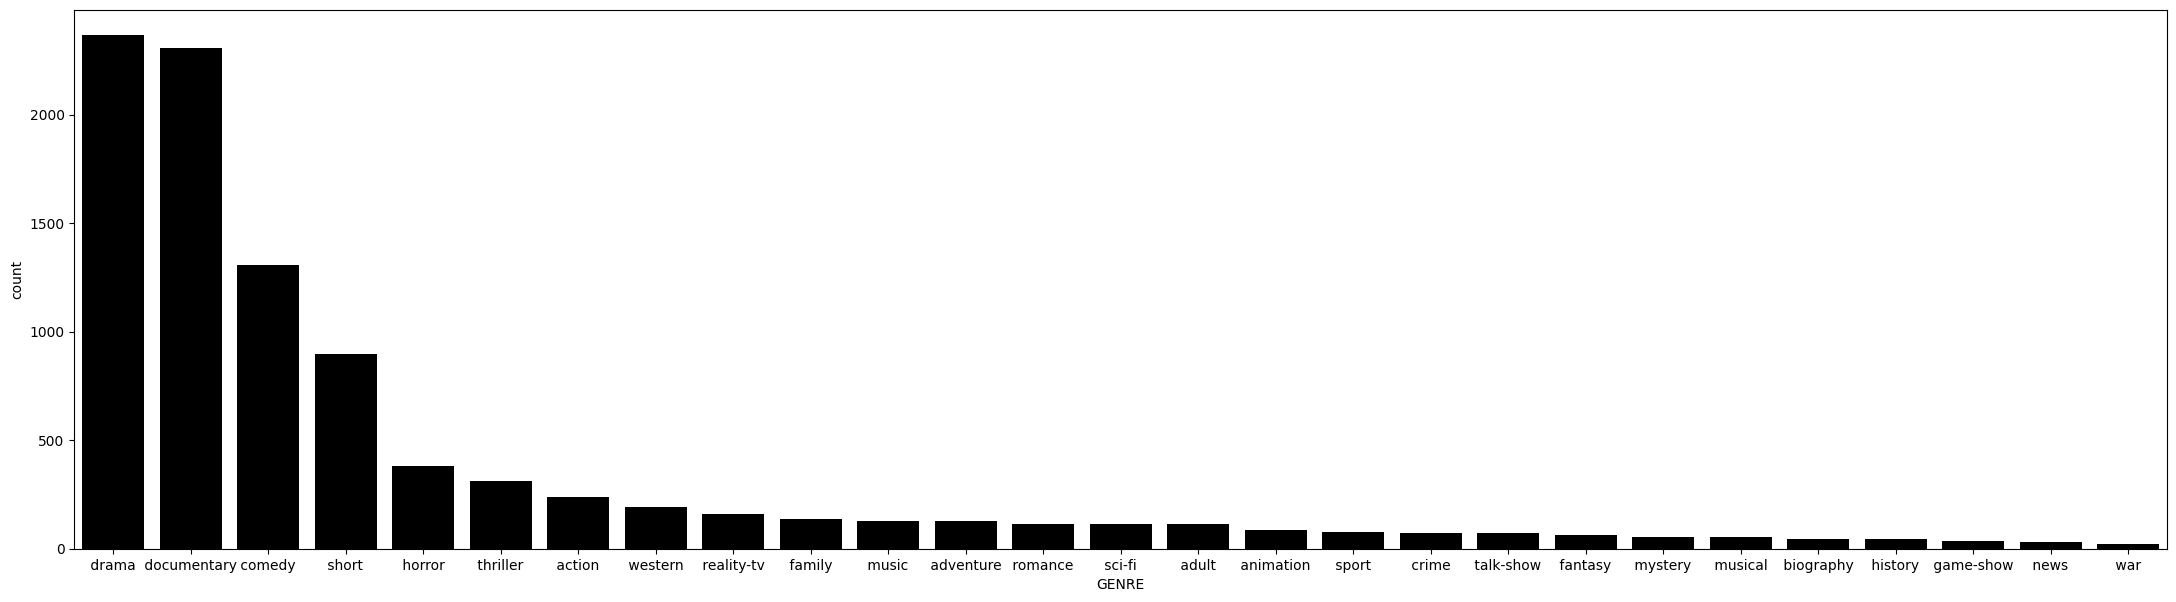

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(27,7))
sns.countplot(data=train_data, x="GENRE", order= train_data["GENRE"].value_counts().index, color = "black")
plt.show()

In [ ]:
print(train_data.duplicated().sum())
print(test_data.duplicated().sum())

0
0


In [ ]:
x_train=train_data['DESCRIPTION']
y_train=train_data['GENRE']
x_test=test_data['DESCRIPTION']
y_test=test_data['GENRE']

In [ ]:
def cleaning_data(text):
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z+]', ' ', text)
    text = "".join([i for i in text if i not in string.punctuation])
    text = re.sub(r"\s+", " ", text).strip()
    return text
x_train=x_train.apply(cleaning_data)
x_test=x_test.apply(cleaning_data)

In [ ]:
tfidf=TfidfVectorizer( stop_words ='english',max_features=5000)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)

In [ ]:
tfidf=TfidfVectorizer( stop_words ='english',max_features=5000)
x_train=tfidf.fit_transform(x_train)
x_test=tfidf.transform(x_test)

In [ ]:
X_train,X_val,Y_train,Y_val=train_test_split(x_train,y_train,test_size=0.2,random_state=42)


In [ ]:
nb=MultinomialNB()
nb.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
y_pred=nb.predict(X_val)

In [ ]:
accuracy_train=accuracy_score(Y_val, y_pred)
print("Train accuracy:", accuracy_train)
print("Train classification report:")
print(classification_report(Y_val, y_pred,zero_division=0))

Train accuracy: 0.44805876180482684
Train classification report:
               precision    recall  f1-score   support

      action        0.00      0.00      0.00        26
       adult        0.00      0.00      0.00        12
   adventure        0.00      0.00      0.00         8
   animation        0.00      0.00      0.00         5
   biography        0.00      0.00      0.00         7
      comedy        0.58      0.11      0.18       139
       crime        0.00      0.00      0.00         4
 documentary        0.51      0.89      0.65       233
       drama        0.39      0.89      0.54       229
      family        0.00      0.00      0.00        14
     fantasy        0.00      0.00      0.00         4
   game-show        0.00      0.00      0.00         7
     history        0.00      0.00      0.00         3
      horror        0.00      0.00      0.00        40
       music        0.00      0.00      0.00         7
     musical        0.00      0.00      0.00         2

In [ ]:
y_pred_test=nb.predict(x_test)
accuracy_test=accuracy_score(y_test, y_pred_test)
print("\nTest accuracy:", accuracy_test)
print("Test classification report:")
print(classification_report(y_test, y_pred_test,zero_division=0))


Test accuracy: 0.0
Test classification report:
                                                                                                                           precision    recall  f1-score   support

                                                                                                  "#NotMadMonday" (2015)        0.00      0.00      0.00       1.0
                                                                                                        "10454" (2017/I)        0.00      0.00      0.00       1.0
                                                                                                      "18 & Over" (2005)        0.00      0.00      0.00       1.0
                                                                                                  "3 Non-Blondes" (2003)        0.00      0.00      0.00       1.0
                                                                                                "4X (Non-verbal)" (2012)        0.00    